In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
path = "C:/Users/kuohe/ClimateWins/02 Data/Multi-class Weather Dataset"
folders = os.listdir(path)
print(folders)


['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [19]:
test_generator.n // test_generator.batch_size

7

In [26]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 100, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size-1,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size-1,
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.9164 - loss: 0.0335 - val_accuracy: 0.8438 - val_loss: 0.0601
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9549 - loss: 0.0161 - val_accuracy: 0.9375 - val_loss: 0.0226
Epoch 3/100


C:\Users\kuohe\anaconda2\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.9348 - loss: 0.0240 - val_accuracy: 0.8906 - val_loss: 0.0498
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.0152 - val_accuracy: 0.8438 - val_loss: 0.0654
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.9447 - loss: 0.0197 - val_accuracy: 0.8958 - val_loss: 0.0434
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.0122 - val_accuracy: 0.8750 - val_loss: 0.0434
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.9647 - loss: 0.0132 - val_accuracy: 0.8594 - val_loss: 0.0587
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9525 - loss: 0.0188 - val_accuracy: 0.8750 - val_loss: 0.0460
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.9672 - loss: 0.0143 - val_accuracy: 0.8177 - val_loss: 0.0826
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9525 - loss: 0.0168 - val_accuracy: 0.7500 - 

27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.9871 - loss: 0.0061 - val_accuracy: 0.8854 - val_loss: 0.0479
Epoch 54/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8438 - val_loss: 0.0652
Epoch 55/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9957 - loss: 0.0028 - val_accuracy: 0.8906 - val_loss: 0.0508
Epoch 56/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9838 - loss: 0.0080 - val_accuracy: 0.9375 - val_loss: 0.0305
Epoch 57/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.9835 - loss: 0.0060 - val_accuracy: 0.8906 - val_loss: 0.0462
Epoch 58/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9062 - val_loss: 0.0478
Epoch 59/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.9935 - loss: 0.0038 - val_accuracy: 0.8958 - val_loss: 0.0508
Epoch 60/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.93

In [27]:
results = pd.DataFrame(model.history.history)

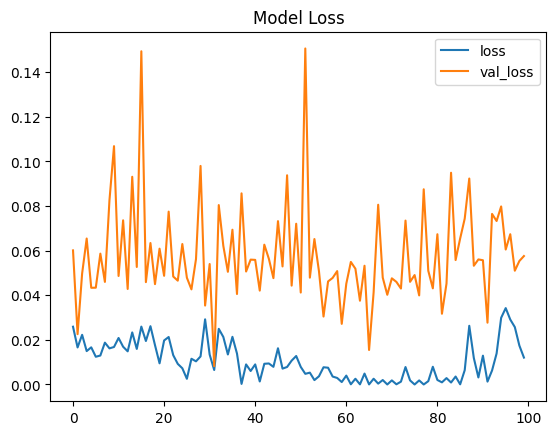

In [28]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

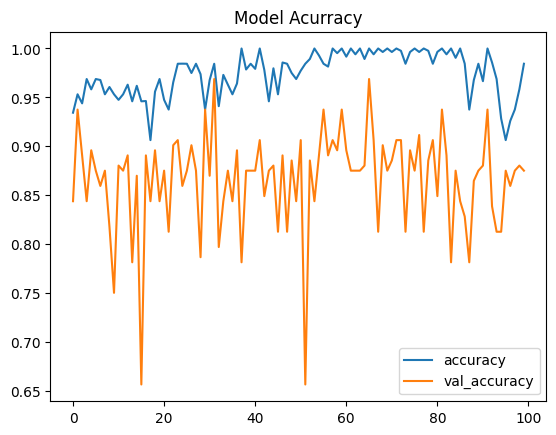

In [29]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [30]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.984375, Val_Accuracy: 0.875
Loss: 0.012059367261826992, Val_Loss: 0.057586610317230225


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


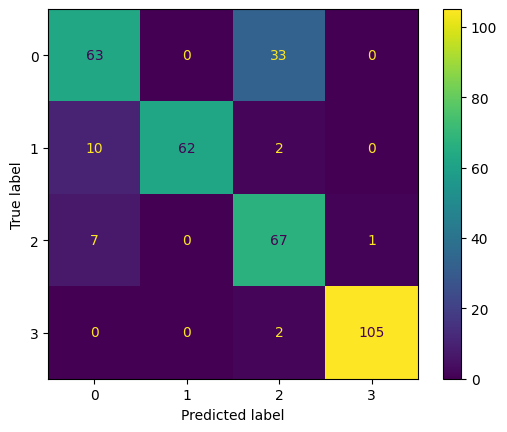

In [31]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [32]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


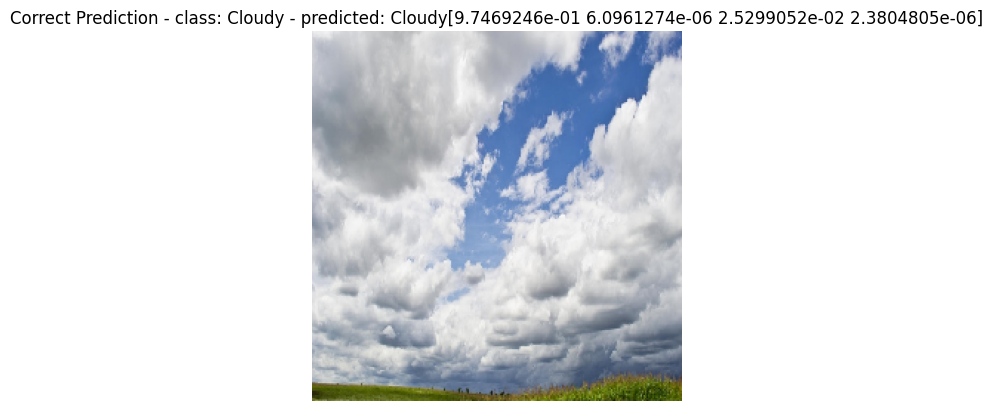

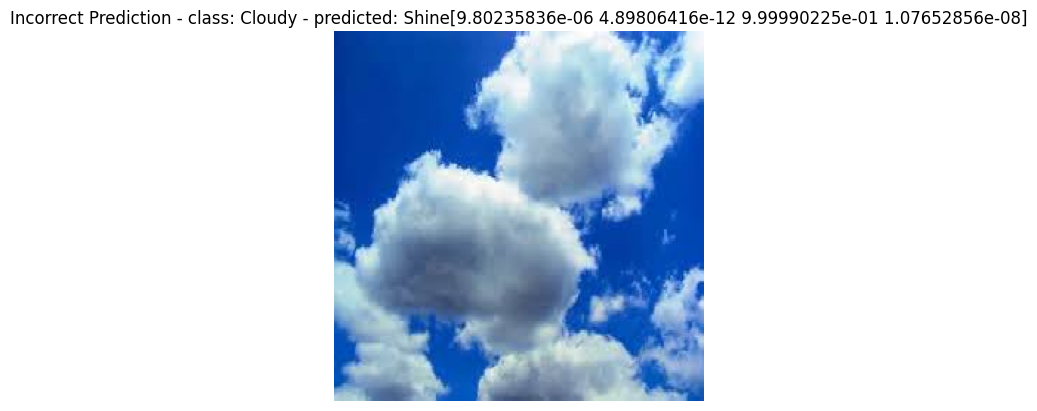

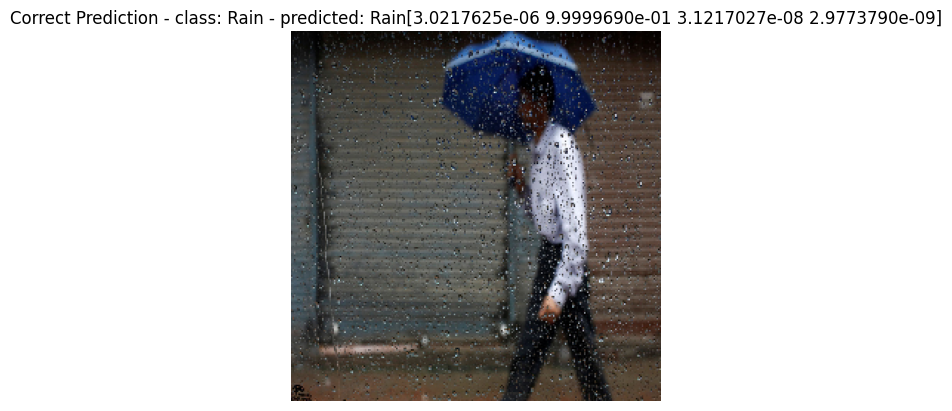

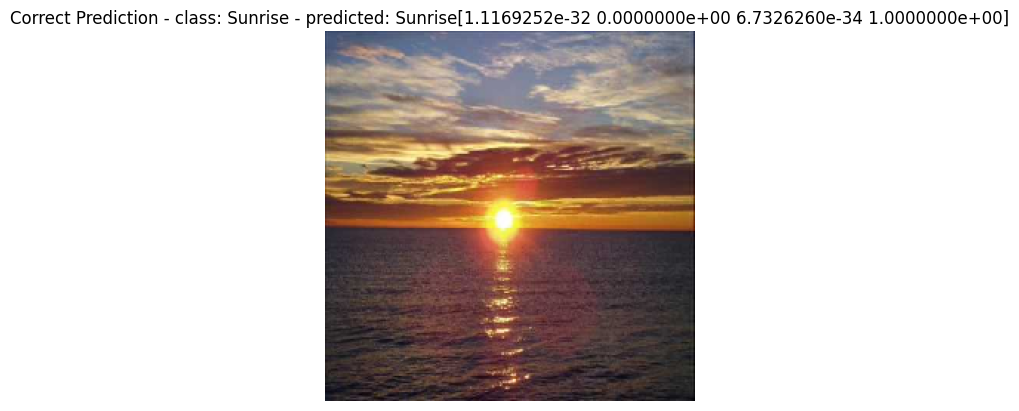

In [33]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see.